### Import Libraries

In [2]:
# Standard Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data Sources

In [3]:
# retrieve from https://www.researchgate.net/publication/268186219_An_Effort_Estimation_Model_for_Agile_Software_Development

data = {'Effort': [156,202,173,331,124,339,97,257,84,211,131,112,101,74,62,289,113,141,213,137,91],
        'Vi': [4.2,3.7,4,4.5,4.9,4.1,4.2,3.8,3.9,4.6,4.6,3.9,3.9,3.9,3.9,4,4,4,4,3.7,3.7],
        'D': [0.687,0.701,0.878,0.886,0.903,0.903,0.859,0.833,0.646,0.758,0.758,0.773,0.773,0.773,0.773,0.742,0.742,0.742,0.742,0.758,0.758],
        'V': [2.7,2.5,3.3,3.8,4.2,3.6,3.4,3,2.4,3.2,3.2,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,2.7,2.7],
        'Sprint Size': [10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10],
        'Work Days': [22,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22],
        'Act:Time': [63,92,56,86,32,91,35,93,36,62,45,37,32,30,21,112,39,52,80,56,35]
       }

df_project = pd.DataFrame(data)

#### Export dataset

In [ ]:
# use original dataset to get user input since the processed data is scaled and output value is scaled as well.
df_project.to_csv('agile_dataset.csv', index=False)

### Preprocess dataset for evaluation purposes

In [4]:
df_project.describe()

,Effort,Vi,D,V,Sprint Size,Work Days,Act:Time
count,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000
mean,163.714286,4.071429,0.780381,3.023810,10.0,21.952381,56.428571
std,82.743062,0.325796,0.071028,0.438069,0.0,0.218218,26.177417
min,62.000000,3.700000,0.646000,2.400000,10.0,21.000000,21.000000
25%,101.000000,3.900000,0.742000,2.800000,10.0,22.000000,35.000000
50%,137.000000,4.000000,0.758000,2.900000,10.0,22.000000,52.000000
75%,211.000000,4.200000,0.833000,3.200000,10.0,22.000000,80.000000
max,339.000000,4.900000,0.903000,4.200000,10.0,22.000000,112.000000


In [5]:
pd.DataFrame(df_project.skew(), columns=['Act:Time'])

,Act:Time
Effort,0.928819
Vi,1.192888
D,0.372233
V,1.203352
Sprint Size,0.000000
Work Days,-4.582576
Act:Time,0.652416


In [6]:
pd.DataFrame(df_project.kurt(), columns=['Act:Time'])

,Act:Time
Effort,-0.113902
Vi,0.859918
D,-0.417613
V,1.416603
Sprint Size,0.000000
Work Days,21.000000
Act:Time,-0.767895


<AxesSubplot: >

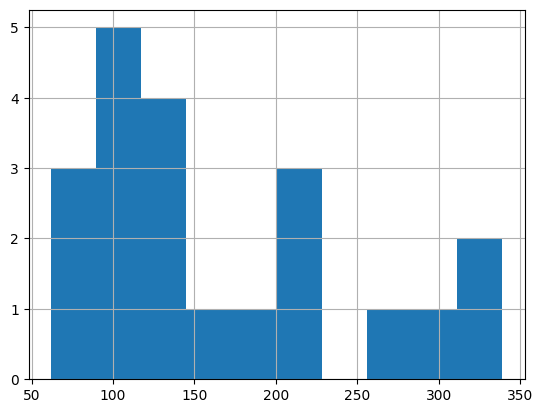

In [7]:
# df_project['Act:Time'].hist()
df_project['Effort'].hist()

In [14]:
df_project['Act:Time'] = np.log(df_project['Act:Time'])
# df_project['Effort'] = np.log(df_project['Effort'])

<AxesSubplot: >

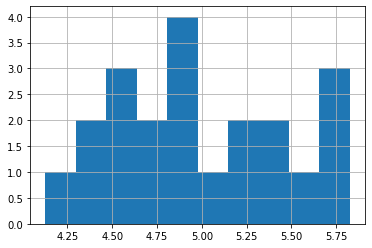

In [94]:
# df_project['Act:Time'].hist()
df_project['Effort'].hist()

In [97]:
pd.DataFrame(df_project.kurt(), columns=['Act:Time'])

,Act:Time
Effort,-0.113902
Vi,0.859918
D,-0.417613
V,1.416603
Sprint Size,0.000000
Act:Time,-1.023869


In [98]:
pd.DataFrame(df_project.skew(), columns=['Act:Time'])

,Act:Time
Effort,0.928819
Vi,1.192888
D,0.372233
V,1.203352
Sprint Size,0.000000
Act:Time,0.063643


In [4]:
print(df_project)

    Effort   Vi      D    V  Sprint Size  Act:Time
0      156  4.2  0.687  2.7           10  4.143135
1      202  3.7  0.701  2.5           10  4.521789
2      173  4.0  0.878  3.3           10  4.025352
3      331  4.5  0.886  3.8           10  4.454347
4      124  4.9  0.903  4.2           10  3.465736
5      339  4.1  0.903  3.6           10  4.510860
6       97  4.2  0.859  3.4           10  3.555348
7      257  3.8  0.833  3.0           10  4.532599
8       84  3.9  0.646  2.4           10  3.583519
9      211  4.6  0.758  3.2           10  4.127134
10     131  4.6  0.758  3.2           10  3.806662
11     112  3.9  0.773  2.9           10  3.610918
12     101  3.9  0.773  2.9           10  3.465736
13      74  3.9  0.773  2.9           10  3.401197
14      62  3.9  0.773  2.9           10  3.044522
15     289  4.0  0.742  2.8           10  4.718499
16     113  4.0  0.742  2.8           10  3.663562
17     141  4.0  0.742  2.8           10  3.951244
18     213  4.0  0.742  2.8    

In [4]:
for col in df_project.columns:
    if col == 'Effort' or col == 'Act:Time':
        if df_project[col].max() != df_project[col].min():
            df_project[col] = (df_project[col] - df_project[col].min()) / (df_project[col].max() - df_project[col].min())
        else:
            df_project[col] = 0.5
# df_project['Act:Time'] = (df_project['Act:Time'] - df_project['Act:Time'].min()) / (df_project['Act:Time'].max() - df_project['Act:Time'].min())
# df_project['Effort'] = (df_project['Effort'] - df_project['Effort'].min()) / (df_project['Effort'].max() - df_project['Effort'].min())

In [5]:
print(df_project)

      Effort   Vi      D    V  Sprint Size  Act:Time
0   0.339350  4.2  0.687  2.7           10  0.656289
1   0.505415  3.7  0.701  2.5           10  0.882489
2   0.400722  4.0  0.878  3.3           10  0.585928
3   0.971119  4.5  0.886  3.8           10  0.842201
4   0.223827  4.9  0.903  4.2           10  0.251624
5   1.000000  4.1  0.903  3.6           10  0.875960
6   0.126354  4.2  0.859  3.4           10  0.305157
7   0.703971  3.8  0.833  3.0           10  0.888947
8   0.079422  3.9  0.646  2.4           10  0.321986
9   0.537906  4.6  0.758  3.2           10  0.646731
10  0.249097  4.6  0.758  3.2           10  0.455287
11  0.180505  3.9  0.773  2.9           10  0.338353
12  0.140794  3.9  0.773  2.9           10  0.251624
13  0.043321  3.9  0.773  2.9           10  0.213070
14  0.000000  3.9  0.773  2.9           10  0.000000
15  0.819495  4.0  0.742  2.8           10  1.000000
16  0.184116  4.0  0.742  2.8           10  0.369802
17  0.285199  4.0  0.742  2.8           10  0.

C:\Users\Zi Qi\anaconda3\envs\ziqi_working\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


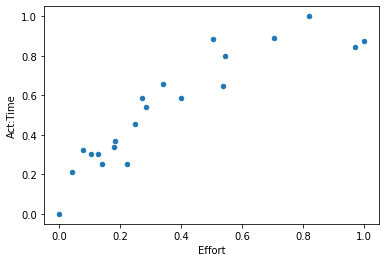

In [101]:
df_project.plot(x ='Effort', y='Act:Time', kind = 'scatter')
plt.show()